In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('network_backup_dataset.csv')
from sklearn.neural_network import MLPRegressor 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_predict, KFold, train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import itertools
from sklearn import datasets
from sklearn import metrics

In [3]:
def convert_to_number(backup):
    #convert day of week to integer number
    backup.loc[backup['Day of Week']=='Monday','Day of Week'] = 1
    backup.loc[backup['Day of Week']=='Tuesday','Day of Week'] = 2
    backup.loc[backup['Day of Week']=='Wednesday','Day of Week'] = 3
    backup.loc[backup['Day of Week']=='Thursday','Day of Week'] = 4
    backup.loc[backup['Day of Week']=='Friday','Day of Week'] = 5
    backup.loc[backup['Day of Week']=='Saturday','Day of Week'] = 6
    backup.loc[backup['Day of Week']=='Sunday','Day of Week'] = 7

    #convert work-flow-id to integer number
    backup['Work-Flow-ID'] = backup['Work-Flow-ID'].str.extract('(\d+)',expand=False).astype(int)
    #convert File Name to integer number
    backup['File Name'] = backup['File Name'].str.extract('(\d+)',expand=False).astype(int)

In [4]:
def residual_plot(prediction, truth):
    residual = truth - prediction
    plt.clf()
    plt.scatter(prediction,residual,edgecolors=(0, 0, 0))
    #plt.plot([truth.min(), truth.max()], [truth.min(), truth.max()], 'k--', lw=2)
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs. Fitted Values')
    plt.grid(True)
    plt.show()

In [5]:
def scatter_plot(prediction, truth):
    plt.clf()
    plt.scatter(truth, prediction, edgecolors=(0, 0, 0))
    plt.plot([truth.min(), truth.max()], [truth.min(), truth.max()], 'k--', lw=2)
    plt.xlabel('Truth Value')
    plt.ylabel('Fitted Value')
    plt.title('Fitted Values vs. True Values')
    plt.grid(True)
    plt.show()
    

In [6]:
dataset = pd.read_csv('network_backup_dataset.csv')
dataset = dataset.replace({'Day of Week':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,
'Saturday':6,'Sunday':7}})
workflowdict = dict()
filedict = dict()
for wf in dataset['Work-Flow-ID']:
    workflowdict[wf] = int(wf[10:])
for f in dataset['File Name']:
    filedict[f] = int(f[5:])
dataset = dataset.replace({'Work-Flow-ID':workflowdict})
dataset = dataset.replace({'File Name':filedict})

In [7]:
X = dataset.values[:,0:5]
y = dataset.values[:,5]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
enc = OneHotEncoder()
train_encoded = enc.fit_transform(X_train)
train_encoded_arr = train_encoded.toarray() #X_train

test_encoded = enc.transform(X_test)
test_encoded_arr = test_encoded.toarray() #X_test

----------------------------------------------
For activity function relu with hidden layer units 10

Training RMSE: 0.04720510885982884
Testing RMSE: 0.04843351250049155
----------------------------------------------
For activity function relu with hidden layer units 20

Training RMSE: 0.047702967780742775
Testing RMSE: 0.04897149010542834
----------------------------------------------
For activity function relu with hidden layer units 30

Training RMSE: 0.046087943215361235
Testing RMSE: 0.04785284531084713
----------------------------------------------
For activity function relu with hidden layer units 40

Training RMSE: 0.04561069633407129
Testing RMSE: 0.04758786238221821
----------------------------------------------
For activity function relu with hidden layer units 50

Training RMSE: 0.04427266467405485
Testing RMSE: 0.04771834169994812
----------------------------------------------
For activity function relu with hidden layer units 60

Training RMSE: 0.044317427297285064
Testi


Training RMSE: 0.03313562116910128
Testing RMSE: 0.04089026628975636
----------------------------------------------
For activity function relu with hidden layer units 490

Training RMSE: 0.03313020887562881
Testing RMSE: 0.04095794217663321
----------------------------------------------
For activity function relu with hidden layer units 500

Training RMSE: 0.032473696220164404
Testing RMSE: 0.0398085904658445
----------------------------------------------
For activity function relu with hidden layer units 510

Training RMSE: 0.032682058590180724
Testing RMSE: 0.04030827555150648
----------------------------------------------
For activity function logistic with hidden layer units 10

Training RMSE: 0.04717025161240202
Testing RMSE: 0.0472969178159834
----------------------------------------------
For activity function logistic with hidden layer units 20

Training RMSE: 0.046697897345957994
Testing RMSE: 0.046769337288214335
----------------------------------------------
For activity fu


Training RMSE: 0.048507339455905386
Testing RMSE: 0.04835859351602153
----------------------------------------------
For activity function logistic with hidden layer units 450

Training RMSE: 0.047573801058771785
Testing RMSE: 0.04771807597995994
----------------------------------------------
For activity function logistic with hidden layer units 460

Training RMSE: 0.047198948928503674
Testing RMSE: 0.04708931137000861
----------------------------------------------
For activity function logistic with hidden layer units 470

Training RMSE: 0.04784375934117223
Testing RMSE: 0.04781188711878701
----------------------------------------------
For activity function logistic with hidden layer units 480

Training RMSE: 0.047996598575815244
Testing RMSE: 0.04822090112098588
----------------------------------------------
For activity function logistic with hidden layer units 490

Training RMSE: 0.05031478942945417
Testing RMSE: 0.05033506841401295
----------------------------------------------


Training RMSE: 0.04984299814856672
Testing RMSE: 0.04968597262567156
----------------------------------------------
For activity function tanh with hidden layer units 420

Training RMSE: 0.04994096654313201
Testing RMSE: 0.05025468533345077
----------------------------------------------
For activity function tanh with hidden layer units 430

Training RMSE: 0.050300998722698546
Testing RMSE: 0.05053818476879406
----------------------------------------------
For activity function tanh with hidden layer units 440

Training RMSE: 0.049875546255474835
Testing RMSE: 0.0502054072826672
----------------------------------------------
For activity function tanh with hidden layer units 450

Training RMSE: 0.04981727886722338
Testing RMSE: 0.049652307559245726
----------------------------------------------
For activity function tanh with hidden layer units 460

Training RMSE: 0.0509450860817618
Testing RMSE: 0.050615932350643274
----------------------------------------------
For activity function

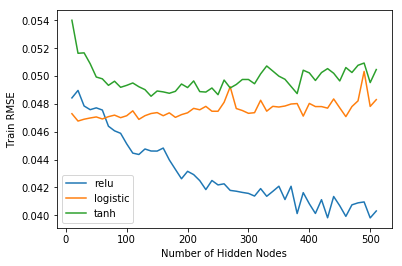

In [9]:
import itertools
dataset = pd.read_csv('network_backup_dataset.csv')
convert_to_number(dataset)
data_scalar = dataset.values[:,0:6]
data_onehotencoded = OneHotEncoder().fit_transform(data_scalar)
ds_arr = data_onehotencoded.toarray()

range_units = np.arange(10, 520, 10)
range_units.astype(np.int64)
activation_types = ['relu', 'logistic', 'tanh']


for i in range(3):
    train_y_axis = []
    test_y_axis = []
    for hidden_units in range_units:
        activation = activation_types[i]
        index = ds_arr.shape[1]-1
        MLP = MLPRegressor(hidden_layer_sizes = hidden_units, activation = activation)
        kf = KFold(n_splits=10, random_state=None, shuffle=True)
        train_rmse = 0
        test_rmse = 0

        predicted = list()
        truth = list()
        print('----------------------------------------------')
        print('For activity function',activation,'with hidden layer units %d' %hidden_units)
        #print (mlp)
        for train_index, test_index in kf.split(ds_arr):
            data_train, data_test = ds_arr[train_index], ds_arr[test_index]
            MLP.fit(data_train[:,0:(index-1)],data_train[:,index])
            train_predict = MLP.predict(data_train[:,0:(index-1)])
            train_true = data_train[:,index]
            test_predict = MLP.predict(data_test[:,0:(index-1)])
            test_true = data_test[:,index]
            predicted.extend(test_predict.tolist())
            truth.extend(test_true.tolist())
            train_rmse += mean_squared_error(train_true, train_predict)
            test_rmse += mean_squared_error(test_true, test_predict)
        predicted = np.asarray(predicted)
        truth = np.asarray(truth)
    
        print()
        print('Training RMSE:', np.sqrt(train_rmse / 10))
        print('Testing RMSE:', np.sqrt(test_rmse / 10))
        train_y_axis.append(sqrt(train_rmse / 10))
        test_y_axis.append(sqrt(test_rmse / 10))
       
    plt.plot(range_units,test_y_axis,label = "%s" %activation_types[i])
    plt.xlabel('Number of Hidden Nodes')
    plt.ylabel('Train RMSE')
    plt.legend()
    #plt.show()